## Clustering: using k-means

In [1]:
#%matplotlib inline
#import matplotlib.pyplot as plt
##import seaborn as sns; sns.set()  # for plot styling
#import numpy as np

In [2]:
#from sklearn.datasets.samples_generator import make_blobs
#X, y_true = make_blobs(n_samples=300, centers=4,
#                       cluster_std=0.60, random_state=0)
#plt.scatter(X[:, 0], X[:, 1], s=50);

In [3]:
#from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=6)
#kmeans.fit(X)
#y_kmeans = kmeans.predict(X)

In [4]:
#plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
#
#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

**Afternoon Practice**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [19]:
x_values = np.random.normal(0,1,5000)
#x_2_values = np.random.normal(10,5,2500)
#x_values= np.concatenate([x_values,x_2_values])
#x_2_values = np.random.exponential(scale=2,size=5000)

y_values = np.random.normal(-5,1,5000)
z_values = np.random.normal(5,1,5000)

f_values = x_values+y_values-z_values

#x_3_values = np.random.normal(10,12,1000)
#y_3_values = np.random.normal(10,12,1000)


## mit Rauschen

In [17]:
noise = np.random.normal(0,1,5000)
f_values = x_values+y_values-z_values+noise

## mit Gewichtungsfaktoren

In [230]:
f_values = x_values+2*y_values-3*z_values

## mit Normierung

In [21]:
dataset = pd.DataFrame()
dataset['x'] = x_values
dataset['y'] = y_values
dataset['z'] = z_values
dataset['f'] = f_values
dataset.head()

,x,y,z,f
0,0.035184,-4.908301,5.163676,-10.036793
1,0.097304,-5.213899,6.621243,-11.737838
2,0.472314,-5.442152,4.727109,-9.696948
3,-0.715839,-2.609910,4.095132,-7.420881
4,-1.121118,-4.949949,5.430961,-11.502027


In [355]:
x = np.array(dataset.iloc[2:,0:1])
scale_x = (1/(max(x)-min(x)))
float(scale_x)


0.12312592288140256

In [356]:
min(x)*scale_x

array([-0.51333685])

In [357]:
b_x = float((min(x)*scale_x))
print(b_x)

-0.5133368534696446


In [358]:
l = x*scale_x + b_x
print(l)
print(max(l),min(l))

[[-0.41298772]
 [-0.50237178]
 [-0.54619358]
 ...
 [-0.50332137]
 [-0.67967787]
 [-0.47146771]]
[-0.02667371] [-1.02667371]


In [359]:
b_x

-0.5133368534696446

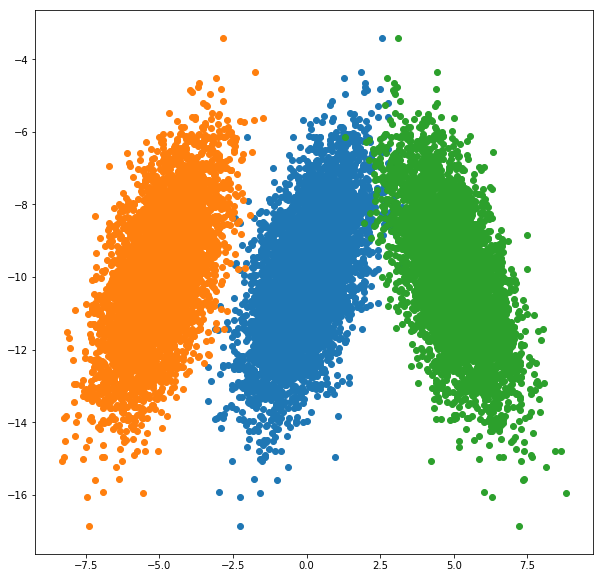

In [34]:
plt.figure(1,figsize=(10,10), )
plt.scatter(dataset['x'] ,dataset['f'])
plt.scatter(dataset['y'] ,dataset['f'])
plt.scatter(dataset['z'] ,dataset['f'])
plt.show();

In [23]:
a=np.array(x_values)
b=np.array(y_values)
c=np.array(z_values)
d=np.array(f_values)
corr=np.corrcoef([np.array(x_values),b,c,d])
np.round(corr,3)

array([[ 1.   , -0.018,  0.   ,  0.569],
       [-0.018,  1.   , -0.02 ,  0.577],
       [ 0.   , -0.02 ,  1.   , -0.587],
       [ 0.569,  0.577, -0.587,  1.   ]])

In [24]:
sum(corr[3,0:3]**2)

1.001243528141106

In [101]:
a = array([1,2,3,4,6,7,8,9])
>>> b = array([2,4,6,8,10,12,13,15])
>>> c = array([-1,-2,-2,-3,-4,-6,-7,-8])
>>> corrcoef([a,b,c])

#(x_values, y_values, z_values, f_values)

In [25]:
kmeans = KMeans(n_clusters=4,random_state=0).fit(dataset)
dataset['cluster_nr'] = kmeans.predict(dataset)


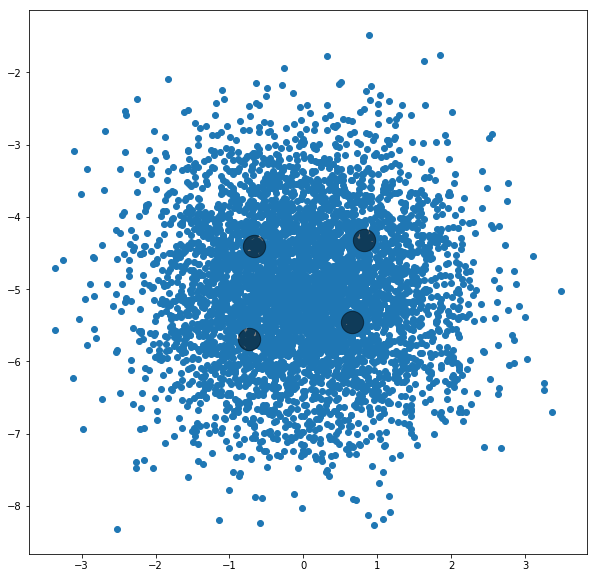

In [33]:
#Plot using scatter
plt.figure(1,figsize=(10,10))
plt.scatter(dataset['x'],dataset['y'] )
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5);


plt.show();

In [28]:
dataset

,x,y,z,f,cluster_nr
0,0.035184,-4.908301,5.163676,-10.036793,3
1,0.097304,-5.213899,6.621243,-11.737838,0
2,0.472314,-5.442152,4.727109,-9.696948,3
3,-0.715839,-2.609910,4.095132,-7.420881,2
4,-1.121118,-4.949949,5.430961,-11.502027,0
5,-0.057788,-4.730395,4.493027,-9.281210,1
6,0.576854,-7.213010,3.847153,-10.483309,3
7,-1.251080,-5.360061,3.821806,-10.432948,1
8,-0.187253,-4.102885,5.970432,-10.260569,1
9,-0.212309,-4.048517,5.894108,-10.154934,1


In [31]:
for i in range(0,4):
    print(len(dataset[dataset['cluster_nr'] == i]))

1316
1216
1129
1339


In [32]:
for i in range(0,4):
    description = dataset[dataset['cluster_nr'] == i].describe()
    print(description)

                 x            y            z            f  cluster_nr
count  1316.000000  1316.000000  1316.000000  1316.000000      1316.0
mean     -0.737298    -5.699722     5.703614   -12.140634         0.0
std       0.785690     0.836688     0.858834     0.862952         0.0
min      -3.364818    -8.314119     3.043274   -16.861946         0.0
25%      -1.232242    -6.243883     5.131132   -12.617044         0.0
50%      -0.719384    -5.698900     5.698786   -11.952150         0.0
75%      -0.218949    -5.145340     6.278072   -11.466439         0.0
max       1.452169    -3.249526     8.815195   -10.905628         0.0
                 x            y            z            f  cluster_nr
count  1216.000000  1216.000000  1216.000000  1216.000000      1216.0
mean     -0.666741    -4.407370     4.704202    -9.778313         1.0
std       0.606349     0.740474     0.829438     0.722435         0.0
min      -3.101563    -6.577497     1.962456   -11.507623         1.0
25%      -1.030531  